In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/HR_comma_sep.csv')

In [3]:
# Task Formarlization
# 1. predict satisfaction_level based on other attributes (let's try the 1st blood)
# 2. predict if (s)he will leave based on other attributes
#
# Analysis
# 1. I'm not sure if the attributes are enough to predict the results. 
#    But let's just try, and see if there're some statistical significance.
# 2. It'd better to do some cleaning since there may be some missing values.
#
## Hypothesis

In [4]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
df = df.rename(index=str, columns={"satisfaction_level": "satisf", 
                                   "last_evaluation": "last_eval", 
                                   "number_project": "nprojs",
                                   "average_montly_hours": "avg_monthly_hrs",
                                   "time_spend_company": "tm_in_company",
                                   "Work_accident": "work_accd",
                                   "promotion_last_5years": "promo_last_5yrs"})
df.head(20)

,satisf,last_eval,nprojs,avg_monthly_hrs,tm_in_company,work_accd,left,promo_last_5yrs,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [6]:
df.count()

satisf             14999
last_eval          14999
nprojs             14999
avg_monthly_hrs    14999
tm_in_company      14999
work_accd          14999
left               14999
promo_last_5yrs    14999
sales              14999
salary             14999
dtype: int64

In [7]:
df.shape

(14999, 10)

In [14]:
# Missing Data Example
exm = pd.DataFrame([range(3), [0, np.NaN, 0], [0, 0, np.NaN], range(3), range(3)])
print(exm)
exm[exm.isnull().any(axis=1)]

   0    1    2
0  0  1.0  2.0
1  0  NaN  0.0
2  0  0.0  NaN
3  0  1.0  2.0
4  0  1.0  2.0


,0,1,2
1,0,NaN,0.0
2,0,0.0,NaN


In [12]:
# Missing Data
# Ref: 
#      1. https://pandas.pydata.org/pandas-docs/stable/missing_data.html
#      2. https://stackoverflow.com/questions/14247586/python-pandas-how-to-select-rows-with-one-or-more-nulls-from-a-dataframe-without

df[df.isnull().any(axis=1)] # return rows with missing data

,satisf,last_eval,nprojs,avg_monthly_hrs,tm_in_company,work_accd,left,promo_last_5yrs,sales,salary


In [31]:
for col in ['nprojs', 'tm_in_company', 'work_accd', 'left', 'promo_last_5yrs', 'sales', 'salary']:
    print(col + ': ' + str(df[col].unique()))
    print()

nprojs: [2 5 7 6 4 3]

tm_in_company: [ 3  6  4  5  2  8 10  7]

work_accd: [0 1]

left: [1 0]

promo_last_5yrs: [0 1]

sales: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

salary: ['low' 'medium' 'high']



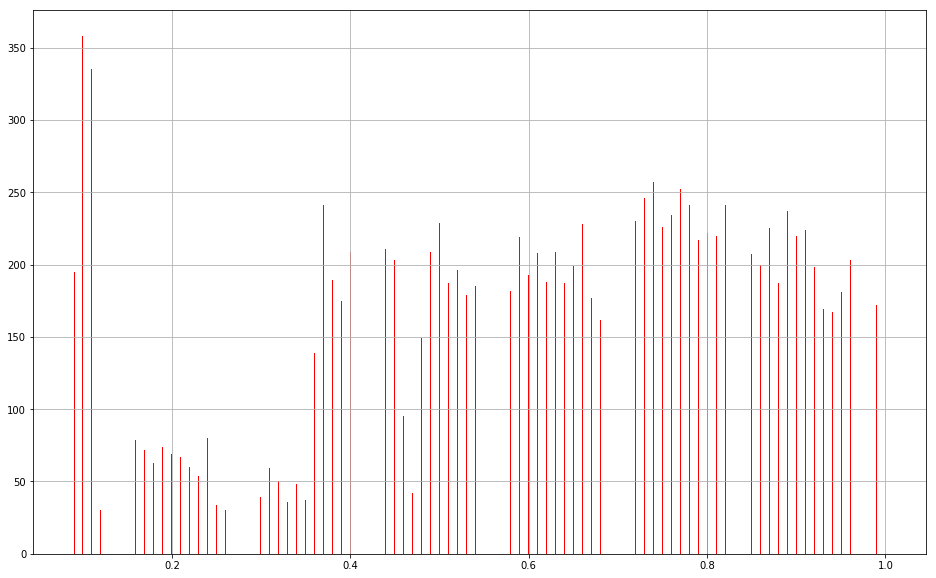

In [33]:
df.satisf.hist(color='r', bins=1000, figsize=(16, 10))
plt.show()

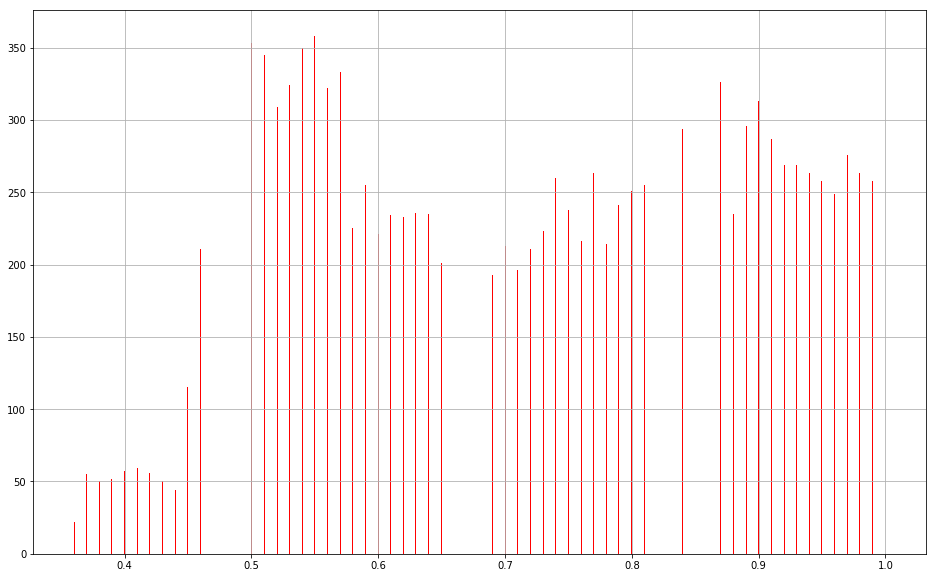

In [34]:
df.last_eval.hist(color='r', bins=1000, figsize=(16, 10))
plt.show()

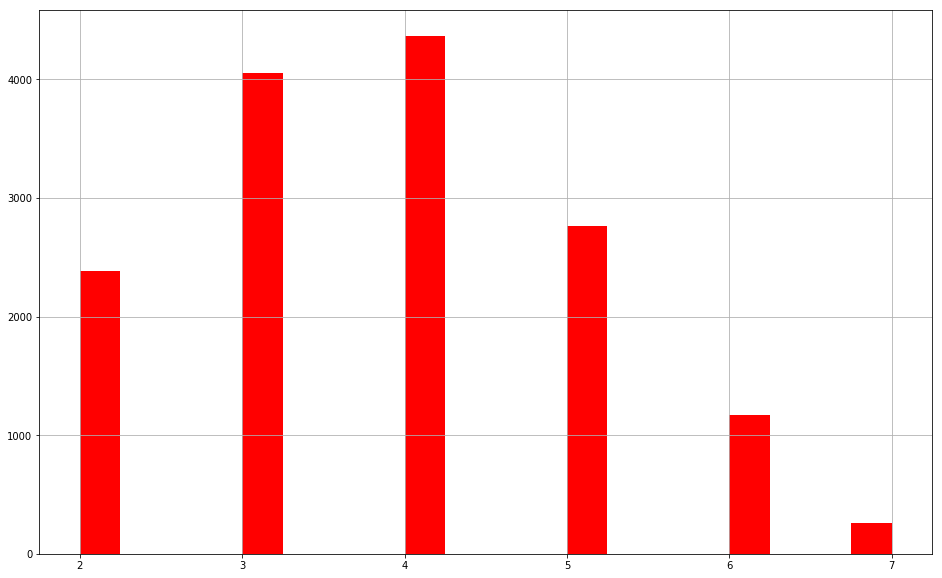

In [41]:
df.nprojs.hist(color='r', bins=20, figsize=(16, 10))
plt.show()

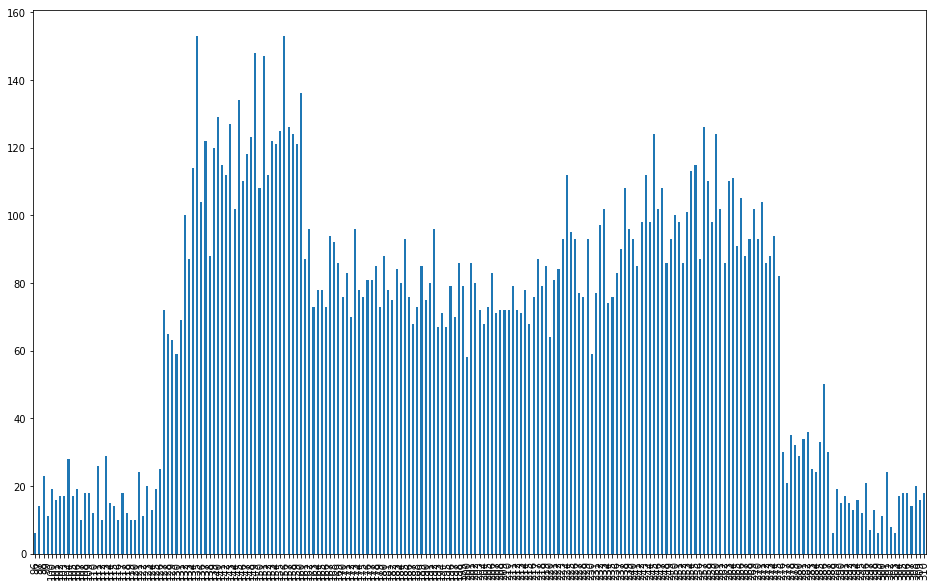

In [64]:
a = df.avg_monthly_hrs.value_counts()
a = a.sort_index()
a.plot(kind='bar', figsize=(16, 10))
# df.sales.value_counts().hist(color='r', bins=10, figsize=(16, 10))
plt.show()

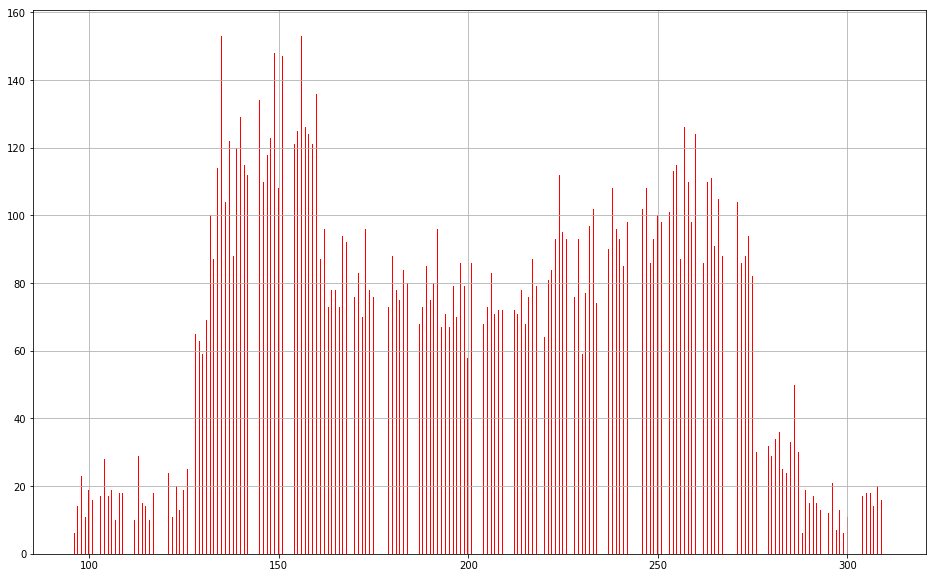

In [43]:
df.avg_monthly_hrs.hist(color='r', bins=1000, figsize=(16, 10))
plt.show()

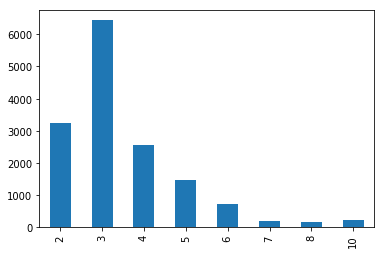

In [62]:
a = df.tm_in_company.value_counts()
a = a.sort_index()
a.plot(kind='bar')
# df.sales.value_counts().hist(color='r', bins=10, figsize=(16, 10))
plt.show()

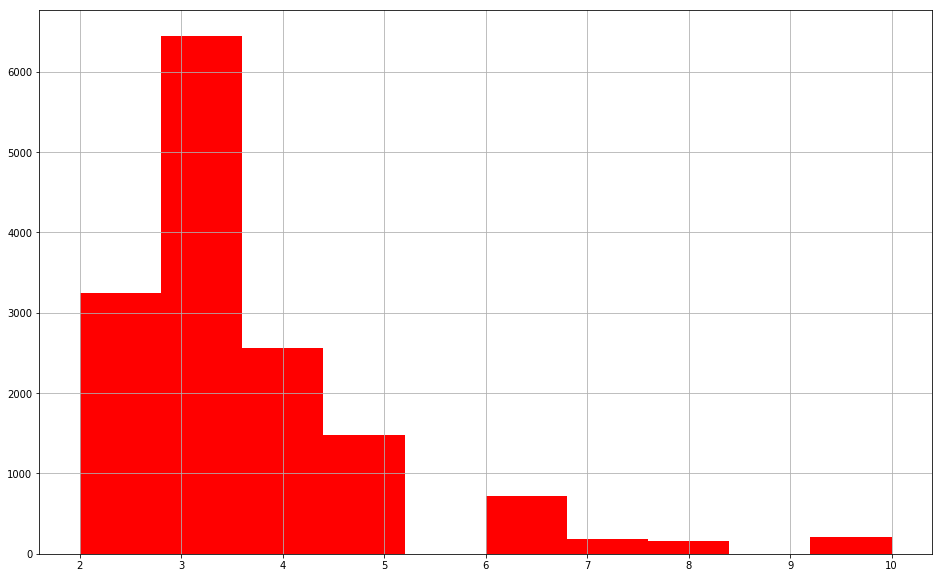

In [45]:
df.tm_in_company.hist(color='r', bins=10, figsize=(16, 10))
plt.show()

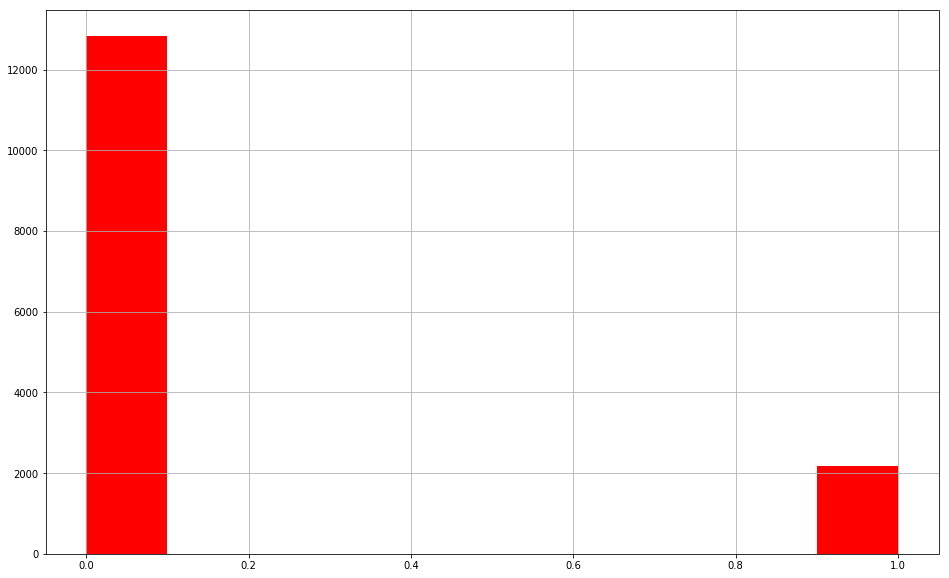

In [46]:
df.work_accd.hist(color='r', bins=10, figsize=(16, 10))
plt.show()

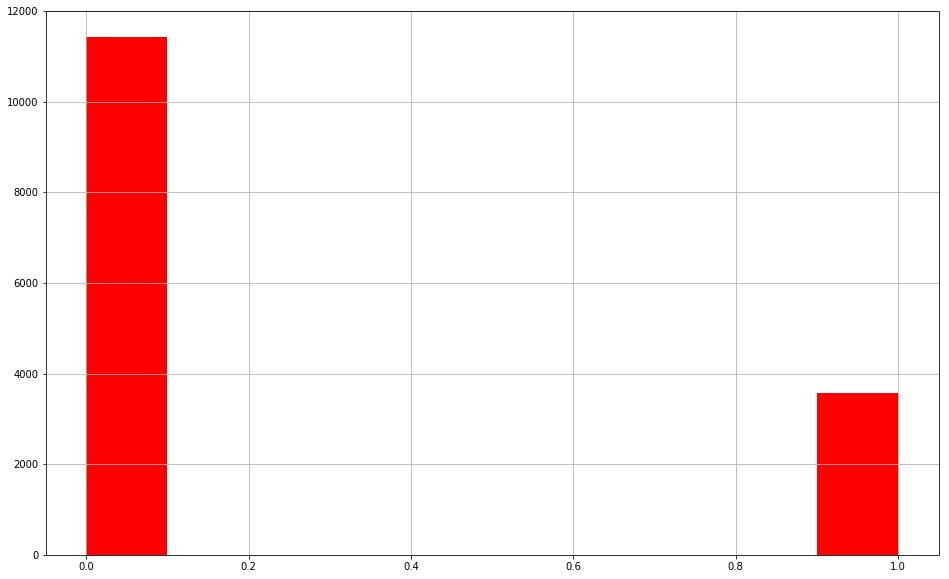

In [47]:
# make sense because most people don't left
# but it's an imbalanced problem?
df.left.hist(color='r', bins=10, figsize=(16, 10))
plt.show()

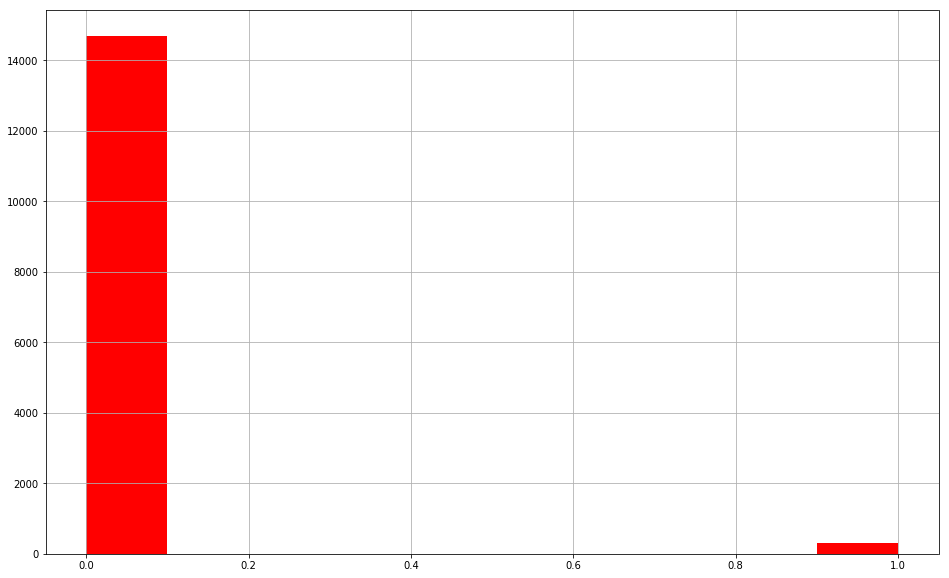

In [48]:
# most people don't get promoted
# it will cause any bad effect, or it will make everything stable?
df.promo_last_5yrs.hist(color='r', bins=10, figsize=(16, 10))
plt.show()

0    14680
1      319
Name: promo_last_5yrs, dtype: int64


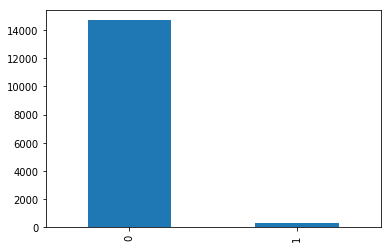

In [55]:
print(df.promo_last_5yrs.value_counts())
df.promo_last_5yrs.value_counts().plot(kind='bar')
plt.show()

IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: sales, dtype: int64


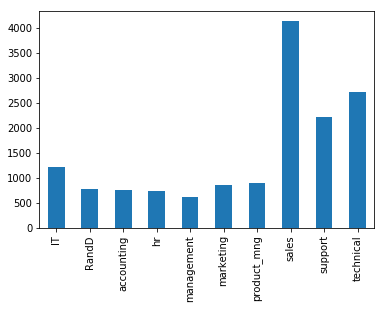

In [65]:
a = df.sales.value_counts()
a = a.sort_index()
print(a)
a.plot(kind='bar')
# df.sales.value_counts().hist(color='r', bins=10, figsize=(16, 10))
plt.show()